<h2><center>HR Analytics</center></h2>

In [1]:
# Import Pandas and NumPy libraries
import numpy as np 
import pandas as pd

# Import Libraries for plotting
import matplotlib.pyplot as plt, seaborn as sns

# Import Warnings library
import warnings
warnings.filterwarnings('ignore')

# Change pandas settings to Display all columns
pd.set_option('display.max_columns',None)

In [2]:
# Import the first Dataset general_data.csv
general_data = pd.read_csv('D:/SHAPEAI/Data-Analysis-and-Machine-Learning-main/Decision Trees HR_Analytics/general_data.csv')

In [3]:
# Import the second Dataset manager_survey_data.csv(contains survey data)
manager_survey_data = pd.read_csv('D:/SHAPEAI/Data-Analysis-and-Machine-Learning-main/Decision Trees HR_Analytics/manager_survey_data.csv')

In [4]:
# Import the third Dataset employee_survey_data.csv(contains survey data)
employee_survey_data = pd.read_csv('D:/SHAPEAI/Data-Analysis-and-Machine-Learning-main/Decision Trees HR_Analytics/employee_survey_data.csv')

In [5]:
# Import the fourth Dataset in_time.csv(contains office entry times)
in_time = pd.read_csv('D:/SHAPEAI/Data-Analysis-and-Machine-Learning-main/Decision Trees HR_Analytics/in_time.csv')

In [6]:
# Import the fifth Dataset out_time.csv(contains office exit times)
out_time = pd.read_csv('D:/SHAPEAI/Data-Analysis-and-Machine-Learning-main/Decision Trees HR_Analytics/out_time.csv')

In [7]:
# Import excel file which contains details about each variables present in all 5 datasets
data_dictionary = pd.read_excel('D:/SHAPEAI/Data-Analysis-and-Machine-Learning-main/Decision Trees HR_Analytics/data_dictionary.xlsx')

In [8]:
# General Data
print('Shape of general data : ',general_data.shape)
general_data.head()

Shape of general data :  (4410, 24)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [9]:
# Manager Survey Data
print('Shape of Manager Survey data : ',manager_survey_data.shape)
manager_survey_data.head()

Shape of Manager Survey data :  (4410, 3)


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [10]:
# Employee Survey Data
print('Shape of Emplyee Survey data : ',employee_survey_data.shape)
employee_survey_data.head()

Shape of Emplyee Survey data :  (4410, 4)


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [11]:
# In time Data
print('Shape of In time data : ',in_time.shape)
in_time.head()

Shape of In time data :  (4410, 262)


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [12]:
# Out time Data
print('Shape of Out time data : ',out_time.shape)
out_time.head()

Shape of Out time data :  (4410, 262)


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2

In [13]:
# View the Data Dictionary and replace null values with blank space
data_dictionary.replace(np.nan," ")

,Variable,Meaning,Levels
0,Age,Age of the employee,
1,Attrition,Whether the employee left in the previous year...,
2,BusinessTravel,How frequently the employees travelled for bus...,
3,Department,Department in company,
4,DistanceFromHome,Distance from home in kms,
5,Education,Education Level,1 'Below College'
6,,,2 'College'
7,,,3 'Bachelor'
8,,,4 'Master'
9,,,5 'Doctor'


In [14]:
# Fill the missing values using DataFrame.fillna
in_time.fillna(0, inplace=True)
out_time.fillna(0, inplace=True)

In [15]:
# Convert all columns to datetime format using pandas.to_datatime
in_time.iloc[:, 1:] = in_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')
out_time.iloc[:, 1:] = out_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

In [16]:
# join in_time and out_time into single total_time using dataframe.append
total_time=in_time.append(out_time)
total_time.shape

(8820, 262)

In [17]:
# find the difference between out_time and in_time

total_time=total_time.diff(periods=4410)      # diff find the difference of two values in a df. 
total_time=total_time.iloc[4410:]             # As the first 4410 value are nan, the diff is availble from 4410 till 8820.

# reset the index as now index starts from 4410
total_time.reset_index(inplace=True)
total_time.head()

,index,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0,0.0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 d

In [18]:
# remove columns with 0 value,since,office was closed on that particular day 
total_time.drop(columns=['index','Unnamed: 0'],axis=1,inplace=True)
total_time.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:

In [19]:
# # remove all 0 columns which represent holidays ()
# total_time.drop(['2015-01-01', '2015-01-14','2015-01-26','2015-03-05','2015-05-01','2015-07-17','2015-09-17','2015-10-02','2015-11-09','2015-11-10','2015-11-11','2015-12-25'], axis = 1,inplace=True) 

In [20]:
# Find mean of each row and save it to a 'mean_time' column
total_time['mean_time']=total_time.mean(axis=1)

In [21]:
# total_time dataframe
total_time

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,

In [22]:
# time record
total_time.iloc[0,0]

Timedelta('0 days 00:00:00')

In [23]:
total_time.mean_time = total_time.mean_time.apply(lambda x : int(str(x).split(' ')[2].split(':')[0]) + int((str(x).split(' ')[2].split(':')[1]))/60
                           + float((str(x).split(' ')[2].split(':')[2]))/3600)


In [24]:
# Again add a column for employee id - since id was from 0 to 4410, we can get it just by resetting the index
total_time.reset_index(inplace=True)

# Lets have a look at the total_time dataframe
total_time.head()

,index,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 0

In [25]:
# rename index as EmployeeID (as it is the columns name in general_data) for convienience while merging datasets
total_time = total_time.rename(columns={'index': 'EmployeeID'})
total_time.head()

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 d

In [26]:
# Since we only need employee id and mean working time of employee, remove all other columns
total_time = total_time.drop((total_time.columns[1:-1]), axis = 1)
total_time

,EmployeeID,mean_time
0,0,6.554356
1,1,6.979604
2,2,6.502698
3,3,6.477067
4,4,7.515375
...,...,...
4405,4405,7.934534
4406,4406,5.626061
4407,4407,6.820812
4408,4408,8.765193


In [27]:
total_time.head()

,EmployeeID,mean_time
0,0,6.554356
1,1,6.979604
2,2,6.502698
3,3,6.477067
4,4,7.515375


In [28]:
# Merge all 5 dataframes two at a time using dataframe.merge
# First merger general_data and manager_survey_data and save it in df dataframe
df = pd.merge(general_data, manager_survey_data, on='EmployeeID', how='inner')

# Merge employee_survey_data to df
df = pd.merge(df, employee_survey_data, on='EmployeeID', how='inner')

# Finally merge mean working time of employees to df
df = pd.merge(df, total_time, on='EmployeeID', how='inner')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,6.979604
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,6.502698
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,6.477067
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,7.515375
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,9.803351


In [29]:
# check column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4409 non-null   int64  
 1   Attrition                4409 non-null   object 
 2   BusinessTravel           4409 non-null   object 
 3   Department               4409 non-null   object 
 4   DistanceFromHome         4409 non-null   int64  
 5   Education                4409 non-null   int64  
 6   EducationField           4409 non-null   object 
 7   EmployeeCount            4409 non-null   int64  
 8   EmployeeID               4409 non-null   int64  
 9   Gender                   4409 non-null   object 
 10  JobLevel                 4409 non-null   int64  
 11  JobRole                  4409 non-null   object 
 12  MaritalStatus            4409 non-null   object 
 13  MonthlyIncome            4409 non-null   int64  
 14  NumCompaniesWorked      

In [30]:
# check distribution of columns
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
count,4409.000000,4409.000000,4409.000000,4409.0,4409.000000,4409.000000,4409.000000,4390.000000,4409.000000,4409.0,4409.000000,4401.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4384.000000,4389.000000,4372.000000,4409.000000
mean,36.923112,9.188251,2.912905,1.0,2205.000000,2.063960,65031.660240,2.695444,15.210252,8.0,0.794058,11.279936,2.798594,7.004990,2.187571,4.122023,2.729644,3.153776,2.723996,2.728184,2.761436,6.978166
std,9.134220,8.100992,1.024048,0.0,1272.912998,1.106814,47073.969139,2.498840,3.659203,0.0,0.851896,7.782222,1.288222,6.122203,3.222042,3.566975,0.711223,0.360775,1.092571,1.101371,0.706245,1.269712
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,5.167828
25%,30.000000,2.000000,2.000000,1.0,1103.000000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,5.990305
50%,36.000000,7.000000,3.000000,1.0,2205.000000,2.000000,49080.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.688881
75%,43.000000,14.000000,4.000000,1.0,3307.000000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000,7.537670
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,10.434399


<h4>'EmployeeCount' & 'StandardHours' have 0 standard deviation (std) which means same values is present in each record.</h4>

In [31]:
# Select categorical columns
obj_cols = df.select_dtypes(include=['object']).columns

# Count the number of unique values in each of the column names saved in obj_cols & print column name if only 1 unique value
for i in obj_cols:
    # calculate unique values 
    unique_values = len(df[i].value_counts())
    if unique_values == 1:
        print(i, 'column has only 1 unique value')

Over18 column has only 1 unique value


In [32]:
# Drop 'EmployeeCount', 'StandardHours', 'Over18' (Since they have single unique value, they do not contribute any information during model training)
df.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis = 1, inplace = True)

<h2><center>Missing Values</center></h2>

In [33]:
# check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           8
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            37
mean_time                   0
dtype: int64

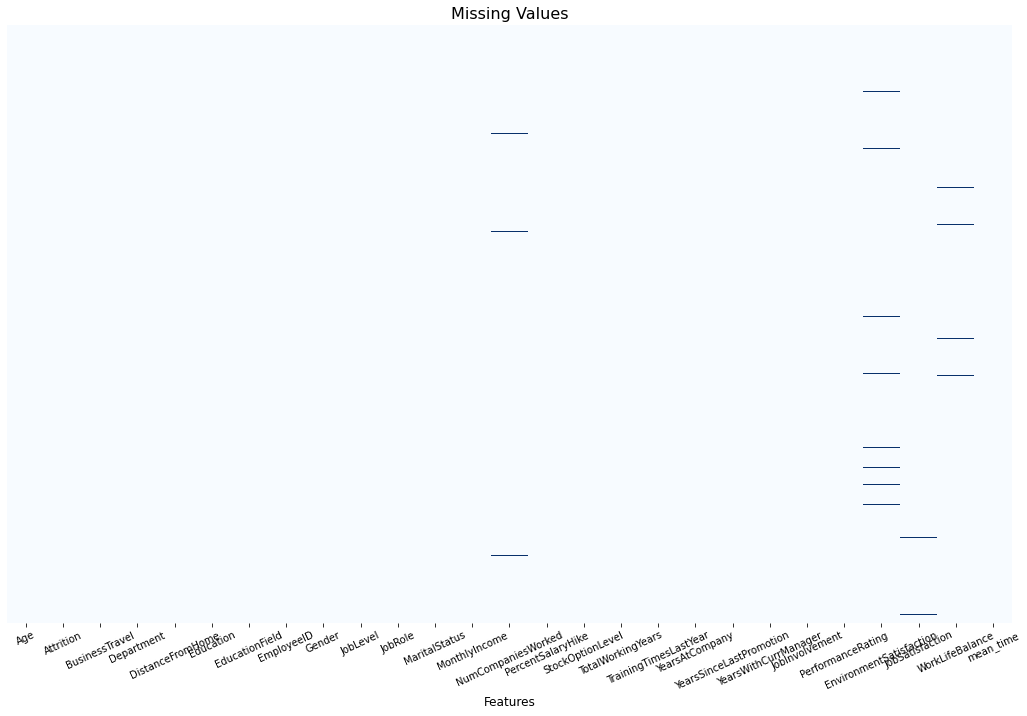

In [34]:
plt.figure(figsize = (18,11))
sns.heatmap(df.isnull(), cmap="Blues", yticklabels=False, cbar = False)
plt.xticks(rotation=25)
plt.xlabel('Features', fontsize = 12)
plt.title('Missing Values', fontsize = 16)
plt.show()

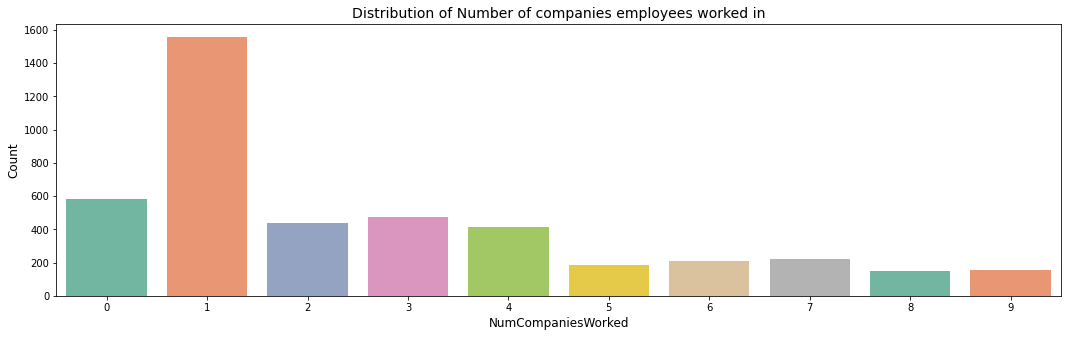

In [35]:
# Check the distribution of MiNumCompaniesWorked

# Plot NumComapniesworked Countplot
plt.figure(figsize=(18,5))
ax = sns.countplot(x='NumCompaniesWorked',data=df, palette='Set2')

# Set xticks name
ax.set(xticks=[0,1,2,3,4,5,6,7,8,9], xticklabels=[0,1,2,3,4,5,6,7,8,9])

# set title, xlabel, ylabel
plt.title('Distribution of Number of companies employees worked in', fontsize=14)
ax.set_xlabel('NumCompaniesWorked',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
plt.show()

In [36]:
# fill missing value with mode .i.e, 1
df['NumCompaniesWorked'].fillna(1.0,inplace = True)

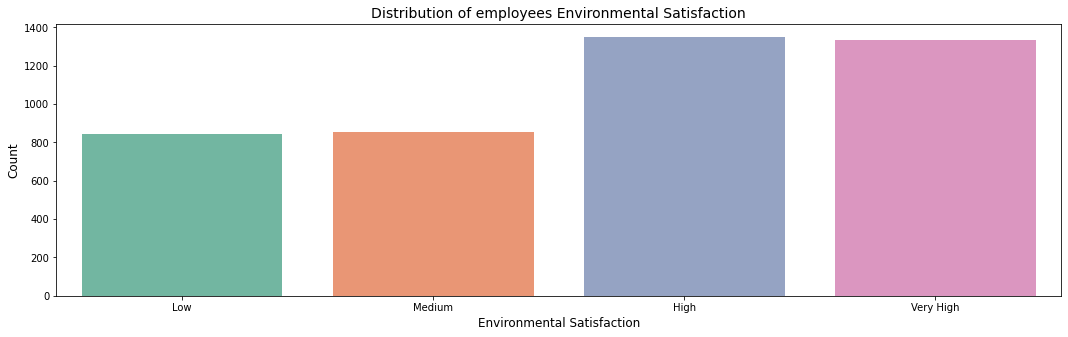

In [37]:
# Check the Distribution of EnvironmentalSatisfaction

# plot countplot of values in EnvironmentalSatisfaction
plt.figure(figsize=(18,5))
ax = sns.countplot(x='EnvironmentSatisfaction',data=df, palette='Set2')

# set x ticks name by refering to data dictionary
ax.set(xticks=[0,1,2,3], xticklabels=['Low','Medium','High','Very High'])

# set title, xlabel, ylabel
plt.title('Distribution of employees Environmental Satisfaction', fontsize=14)
ax.set_xlabel('Environmental Satisfaction',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
plt.show()

In [38]:
# Since there are two values with same count, lets find the median value of EnvironmentalSatisfaction
print('For EnvironmentSatisfaction median :', df.EnvironmentSatisfaction.median())

For EnvironmentSatisfaction median : 3.0


In [39]:
df['EnvironmentSatisfaction'].fillna(3.0,inplace = True)

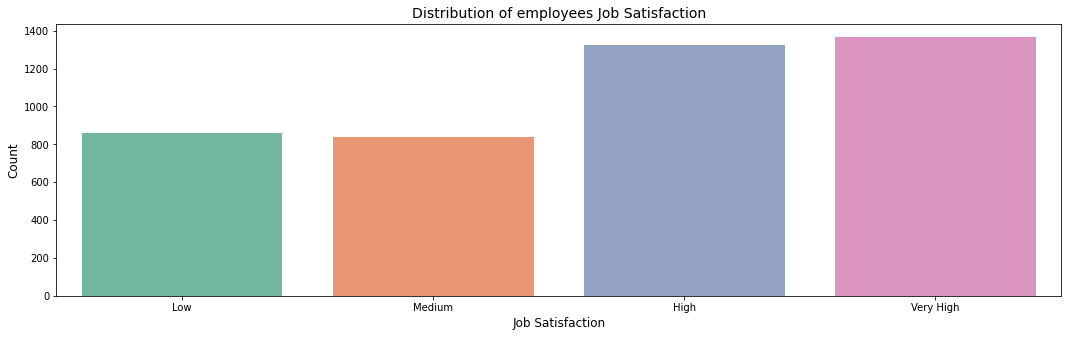

In [40]:
# Check the distribution of JobSatisfaction

# plot countplot of values in JobDistribution
plt.figure(figsize=(18,5))
ax = sns.countplot(x='JobSatisfaction',data=df, palette='Set2')

# set xticks names
ax.set(xticks=[0,1,2,3], xticklabels=['Low','Medium','High','Very High'])

# set title, xlabel, ylabel
plt.title('Distribution of employees Job Satisfaction', fontsize=14)
ax.set_xlabel('Job Satisfaction',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
plt.show()

In [41]:
df.JobSatisfaction.median()

3.0

In [42]:
# fill missing values by 3
df['JobSatisfaction'].fillna(3.0,inplace = True)

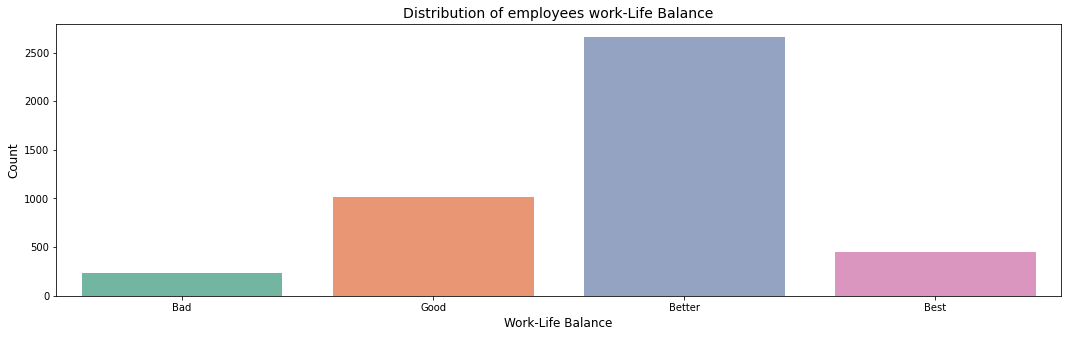

In [43]:
# Check the distribution of WorkLifeBalance

# plot countplot of values in WorkLifeBalance
plt.figure(figsize=(18,5))
ax = sns.countplot(x='WorkLifeBalance',data=df, palette='Set2')
ax.set(xticks=[0,1,2,3], xticklabels=['Bad','Good','Better','Best'])

# set title, xlabel, ylabel
plt.title('Distribution of employees work-Life Balance', fontsize=14)
ax.set_xlabel('Work-Life Balance',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
plt.show()

In [44]:
# fill missing values with mode 3
df['WorkLifeBalance'].fillna(3.0,inplace = True)

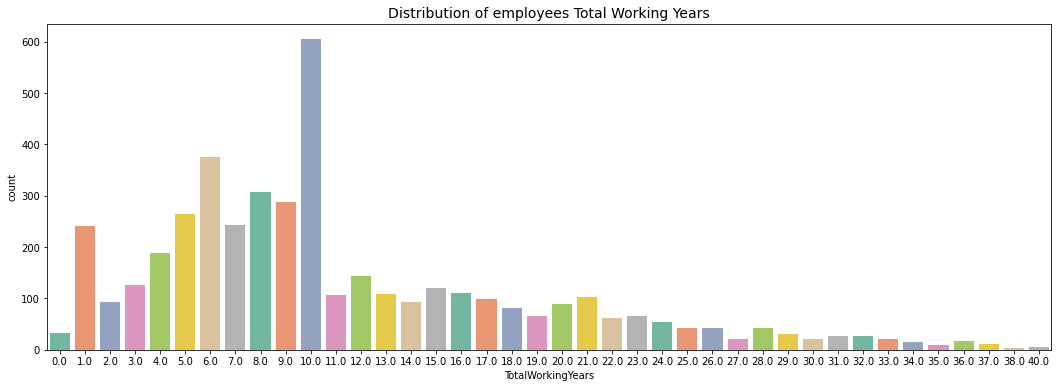

In [45]:
# Check the distribution of TotalWorkingYears

# plot countplot of values in TotalWorkingYears
plt.figure(figsize = (18,6))
sns.countplot(x='TotalWorkingYears',data=df, palette='Set2')

# set title, xlabel, ylabel
plt.title('Distribution of employees Total Working Years', fontsize=14)
ax.set_xlabel('Total Working Years',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
plt.show()

In [46]:
print('Median of Total Working Year :',df.TotalWorkingYears.median())

Median of Total Working Year : 10.0


In [47]:
# fill the missing values with median 10.0
df['TotalWorkingYears'].fillna(10.0,inplace = True)

In [48]:
# check if all the missing values are imputed
print('Total Number of Missing Values remaining :',df.isnull().sum().sum())

Total Number of Missing Values remaining : 0


<h2><center>Exploratory Data Analysis</center></h2>

In [49]:
# make a copy of dataframe
df_eda = df.copy()

In [50]:
# Age - Lets create buckets/bins of 10 years
df_eda.Age = pd.cut(df.Age, range(10, 70, 10)) # Create buckets of 10 years

In [51]:
def make_plot(feature_name, x_ticks = 'not_needed'):
    """This function is used to generate a countplot for the passed input feature present
    in df_eda dataframe. Appropriate plot title, xlabel, ylabel, lengend are also added.
    The last part of this function also places a percentage value over each bar of
    generated countplot.

    Args:
        feature_name: the feature name in string format.
        x_ticks: default value is 'not_needed'. If you want to customize xticks then pass
                 a list containing new xticks.

    """
    # Initialize a figure
    plt.figure(figsize = (18,7))
    
    # Generate a countplot for the passed feature_name
    ax = sns.countplot(x=feature_name, hue='Attrition', data=df_eda, palette='Set2')
    
    # Check if custom x_tick is needed or not
    if x_ticks != 'not_needed':
        # Generate index of xticks
        ticks_index = [i for i in range(len(x_ticks))]
        
        # set new xticks by passing ticks_index and custom xtick labels 
        ax.set(xticks=ticks_index, xticklabels=x_ticks)
        
    # set title, xlabel, ylabel, legend
    plt.xlabel(feature_name,fontsize  = 14)
    plt.ylabel('Employee Count',fontsize  = 14)
    plt.title('{} vs Attrition'.format(feature_name), fontsize = 18)
    plt.legend(fontsize = 14)

    # From axis.patches get bar lengths
    get_bars = ax.patches
    half_bar_length = int(len(get_bars)/2)
    bar_left = get_bars[:half_bar_length]
    bar_right = get_bars[half_bar_length:]
    
    # Place %employees on top of each bar
    for L, R in zip(bar_left, bar_right):
        left_height = L.get_height()
        right_height = R.get_height()
        length_total = left_height + right_height

        # place calculated employee percentage on top of each bar
        ax.text(L.get_x() + L.get_width()/2., left_height + 30, '{0:.0%}'.format(left_height/length_total), ha="center")
        ax.text(R.get_x() + R.get_width()/2., right_height + 30, '{0:.0%}'.format(right_height/length_total), ha="center")

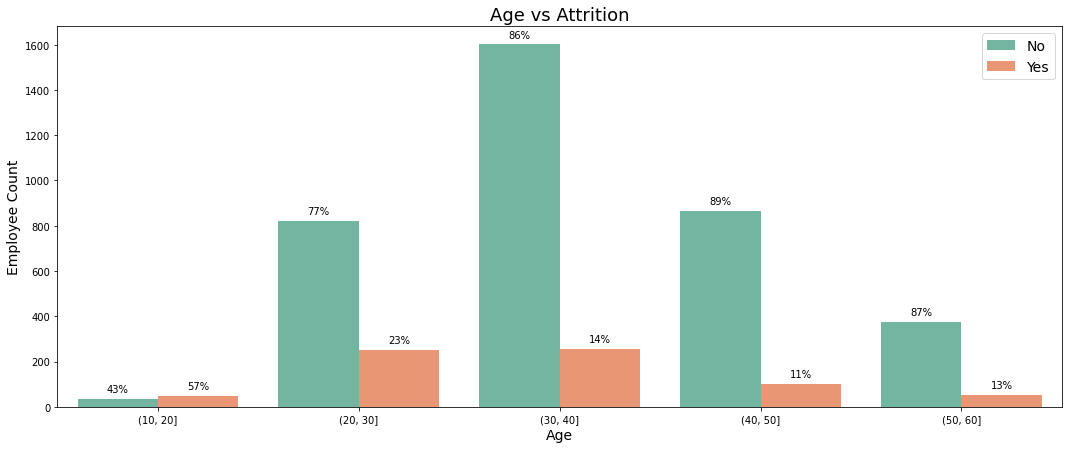

In [52]:
# Age

# using make_plot function, plot a Countplot of Employee's Age by Attrition 
make_plot('Age')

 - Employee Attrition % Reduces with Age. So, company should focus on retaining young employees. 
 - 23% of Employees in Age range 20-30 leave the comapny, maybe in search some better jobs
 - 57% attrition was observed in age range 10-20. But, this may not be a problem as there are just a few employees in this age range. Also most of the employees in this age range must be interns.

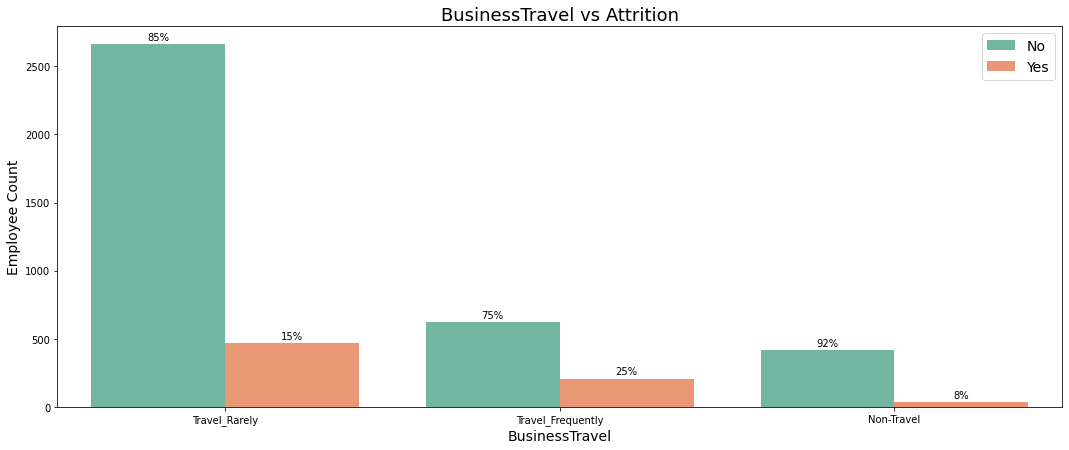

In [53]:
# BusinessTravel

# using make_plot function, plot a Countplot of Employee's BusinessTravel by Attrition 
make_plot('BusinessTravel')

 - We can observe a clear trend of Employees who Travel Frequently tend to have a higher Attrition chance compared to employees who dont travel.

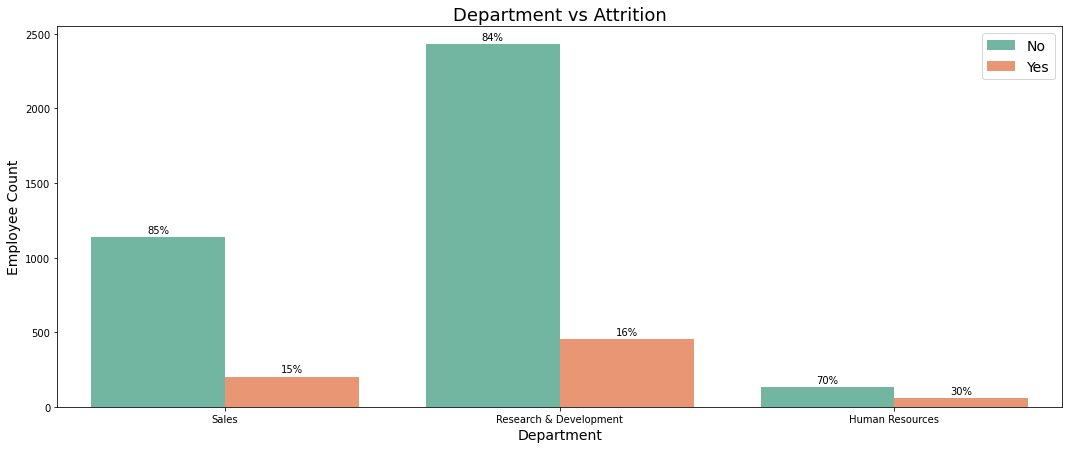

In [54]:
# Department

# using make_plot function, plot a Countplot of Employee's Department by Attrition 
make_plot('Department')

 - Employees in HR Department have much Higher Attrition % compared to Employees in other Departments.

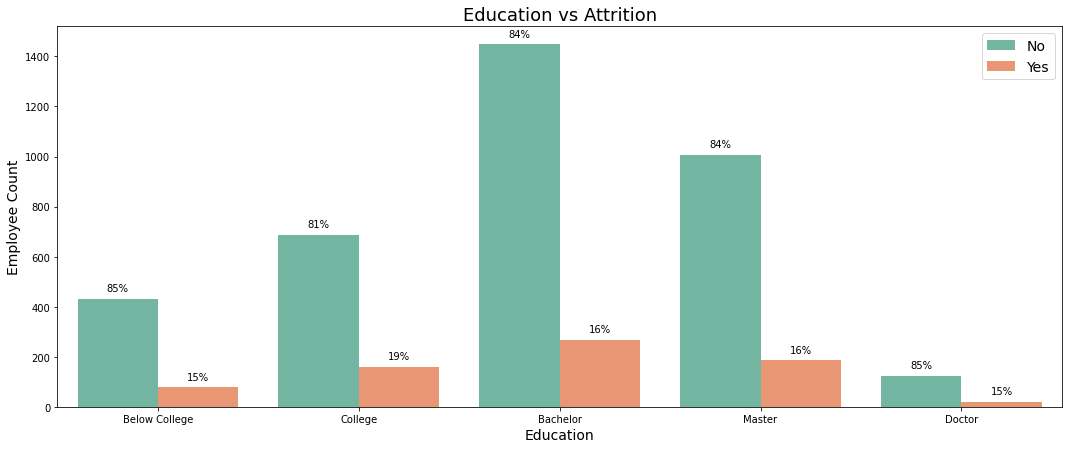

In [55]:
# Education
# using make_plot function, plot a Countplot of Employee's Education by Attrition 
make_plot('Education',['Below College','College','Bachelor','Master','Doctor']) # pass custom xticks as per data dictionary

- Education level of Employee does not appear to have a significant effect on attrition.

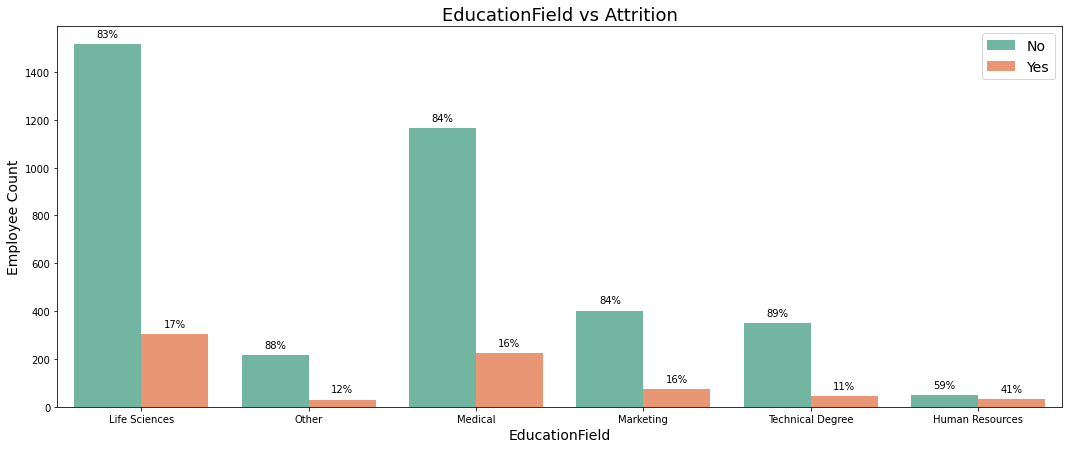

In [56]:
# EducationField
# using make_plot function, plot a Countplot of Employee's EducationField by Attrition 
make_plot('EducationField')

- Just like HR department, Employees with HR related Education History have a higher Attrition %.

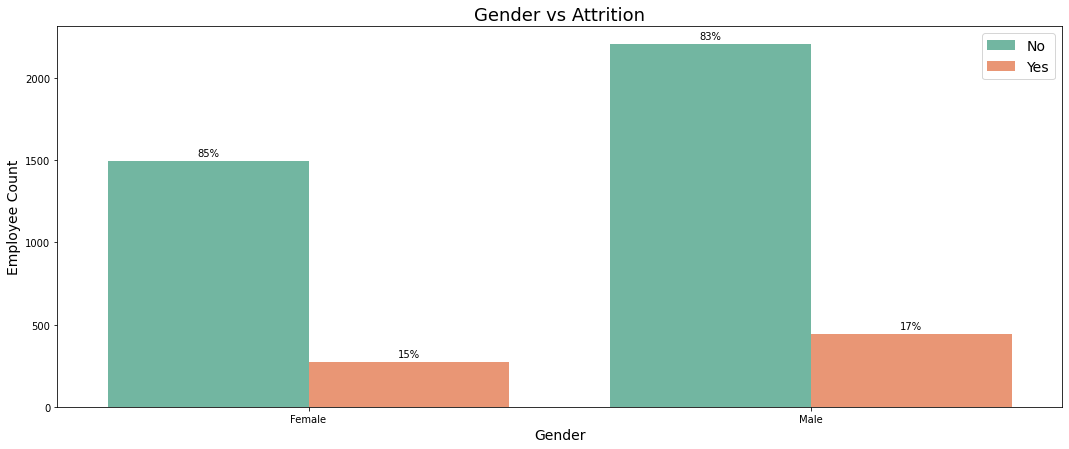

In [57]:
# Gender 
# using make_plot function, plot a Countplot of Employee's Gender by Attrition 
make_plot('Gender')

- Gender does not appear to effect Employee Attrition.

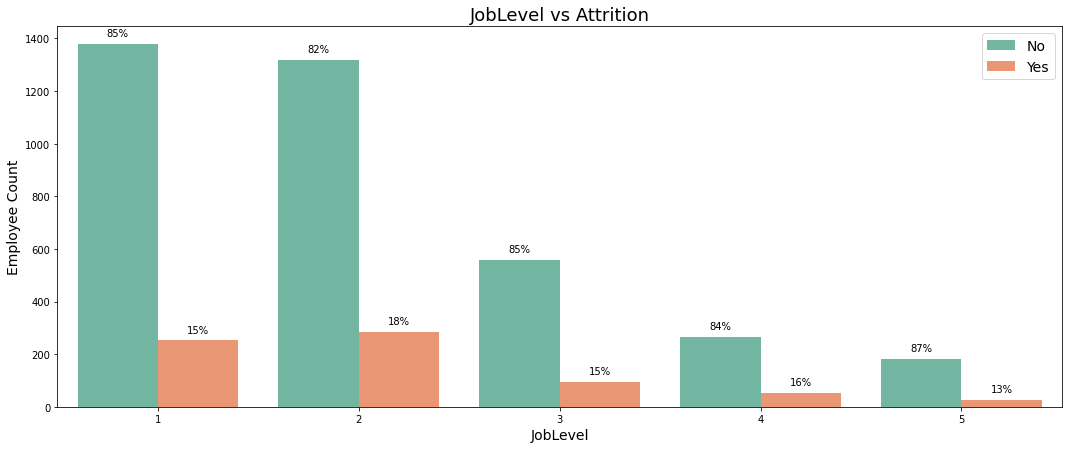

In [58]:
# JobLevel
# using make_plot function, plot a Countplot of Employee's JobLevel by Attrition 
make_plot('JobLevel')

 - Not much effect on attrition with JobLevel. But Attrition appears to be slightly decreasing with increasing JobLevel.

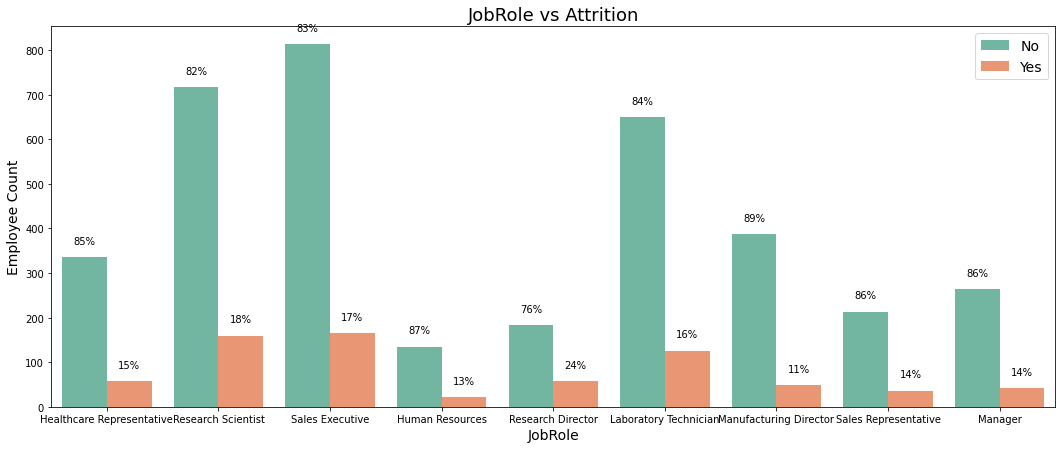

In [59]:
# JobRole
# using make_plot function, plot a Countplot of Employee's JobRole by Attrition 
make_plot('JobRole')

- Research Directors and Research Scientists tend to have a higher % Attrition. Also Sales Executives tend to have a higher attrition rate.

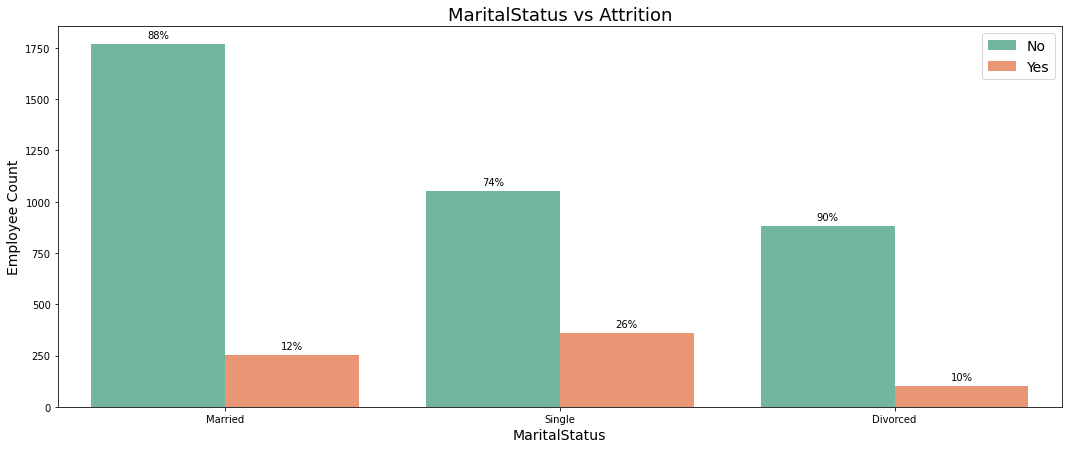

In [60]:
# MaritalStatus
# using make_plot function, plot a Countplot of Employee's MaritalStatus by Attrition 
make_plot('MaritalStatus')

 - Un-married Employees Have much higher attrition chance compared to married/divorced employees.

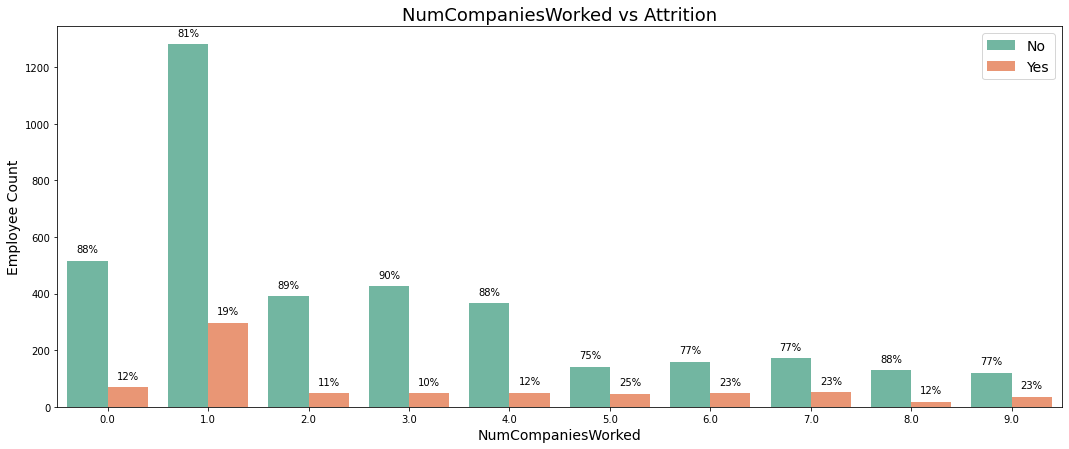

In [61]:
# NumCompaniesWorked
# using make_plot function, plot a Countplot of Employee's NumCompaniesWorked by Attrition 
make_plot('NumCompaniesWorked')

There is no clear trend in attrition with respect to number of companies an employees has worked. Altough employees who have worked in more than 4 companies are highly prone to leave the company.

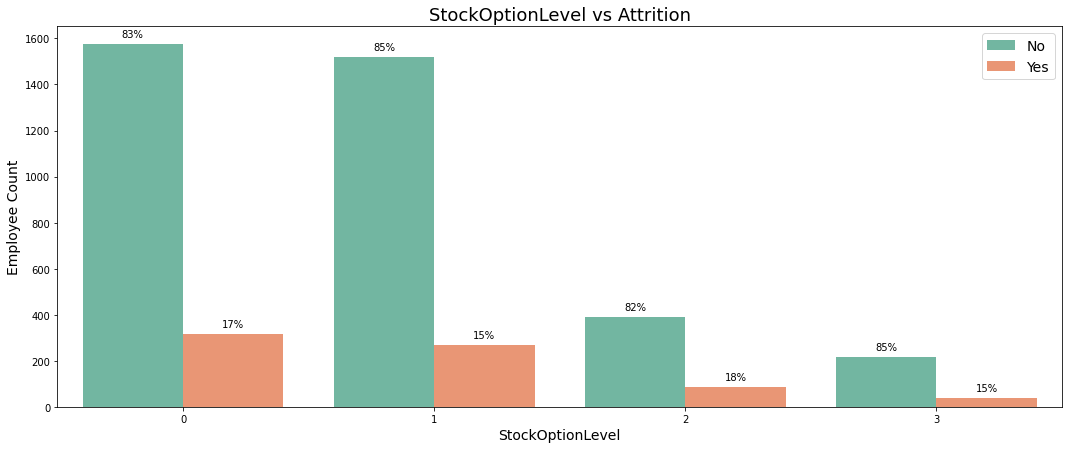

In [62]:
# StockOptionLevel
# using make_plot function, plot a Countplot of Employee's StockOptionLevel by Attrition 
make_plot('StockOptionLevel')

- Not much effect on Attrition with respect to employees StockOptionLevel.

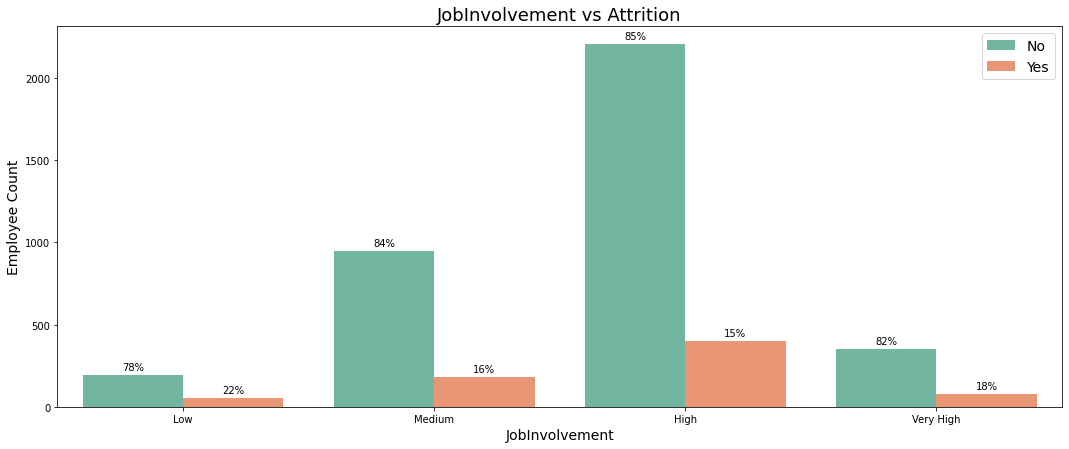

In [63]:
# JobInvolvement
# using make_plot function, plot a Countplot of Employee's JobInvolvement by Attrition 
make_plot('JobInvolvement',['Low','Medium','High','Very High']) # pass custom xticks as per data dictionary

 - Employee with Low job involvement, tend to have a higher Attrition %.

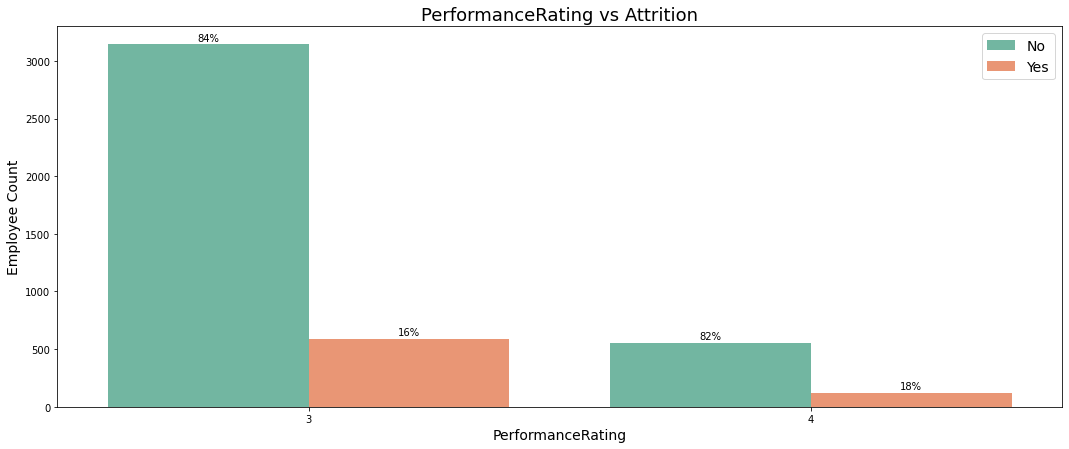

In [64]:
# PerformanceRating 
# using make_plot function, plot a Countplot of Employee's PerformanceRating by Attrition 
make_plot('PerformanceRating')

- Not much difference in attrition with respect to performance rating.

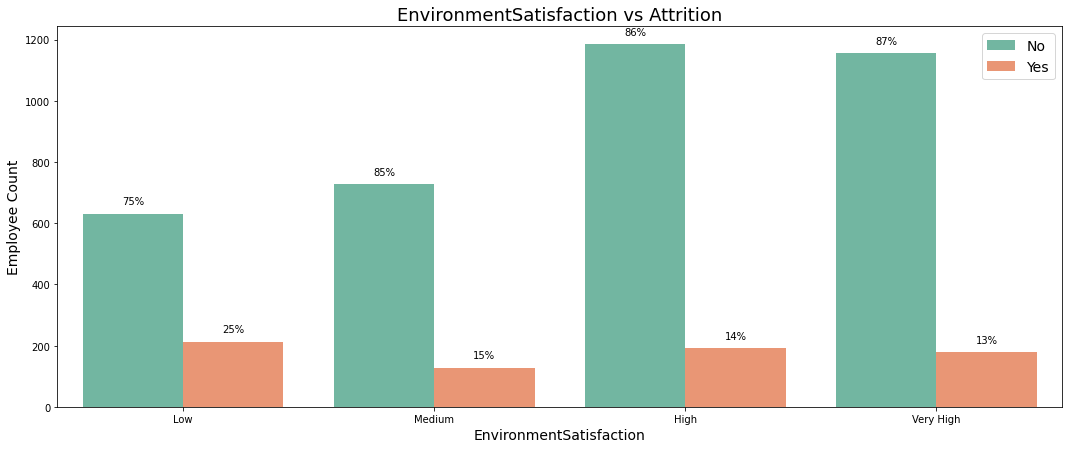

In [65]:
# EnvironmentSatisfaction
# using make_plot function, plot a Countplot of Employee's EnvironmentSatisfaction by Attrition 
make_plot('EnvironmentSatisfaction',['Low','Medium','High','Very High']) # pass custom xticks as per data dictionary

- Attrition Decreases with increasing Environment Satisfaction

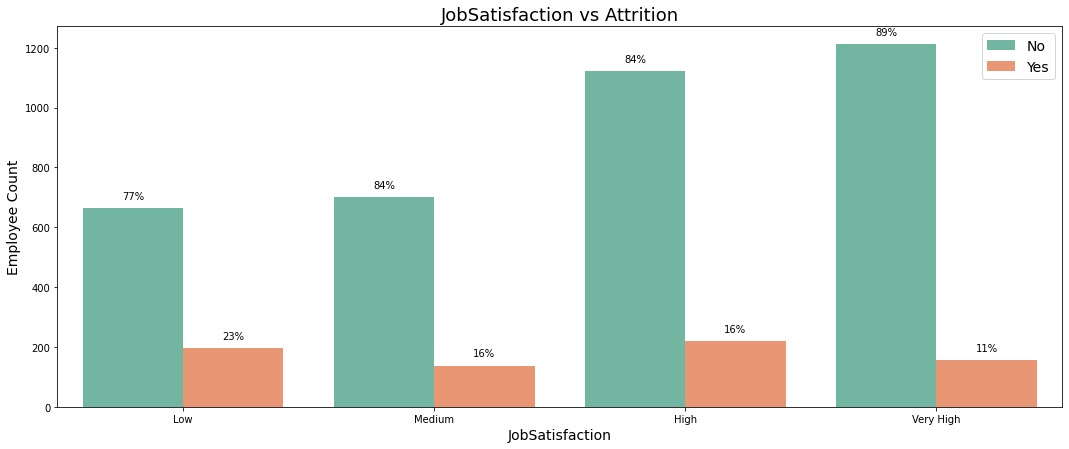

In [66]:
# JobSatisfaction
# using make_plot function, plot a Countplot of Employee's JobSatisfaction by Attrition 
make_plot('JobSatisfaction',['Low','Medium','High','Very High']) # pass custom xticks as per data dictionary

- Job Attrition Decreases with increasing Job Satisfaction.

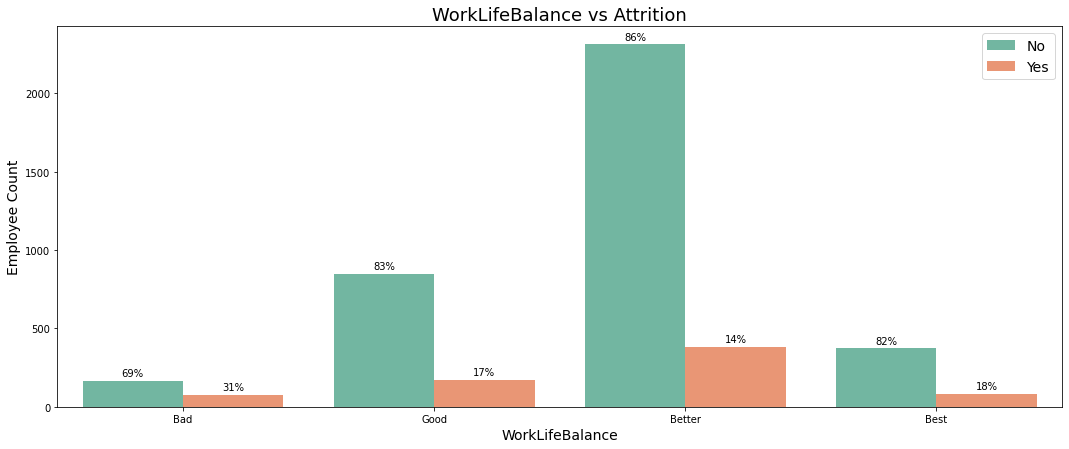

In [67]:
# WorkLifeBalance
# using make_plot function, plot a Countplot of Employee's WorkLifeBalance by Attrition 
make_plot('WorkLifeBalance',['Bad','Good','Better','Best']) # pass custom xticks as per data dictionary

 - As Expected, Employees with Bad work life balance have a higher attrition percentage.

#### Plot rest of the Continuous Variables together

In [68]:
# put remaining continuous features in a list
continuous_features = ['DistanceFromHome','MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany',
'YearsSinceLastPromotion','PercentSalaryHike','YearsWithCurrManager','mean_time']

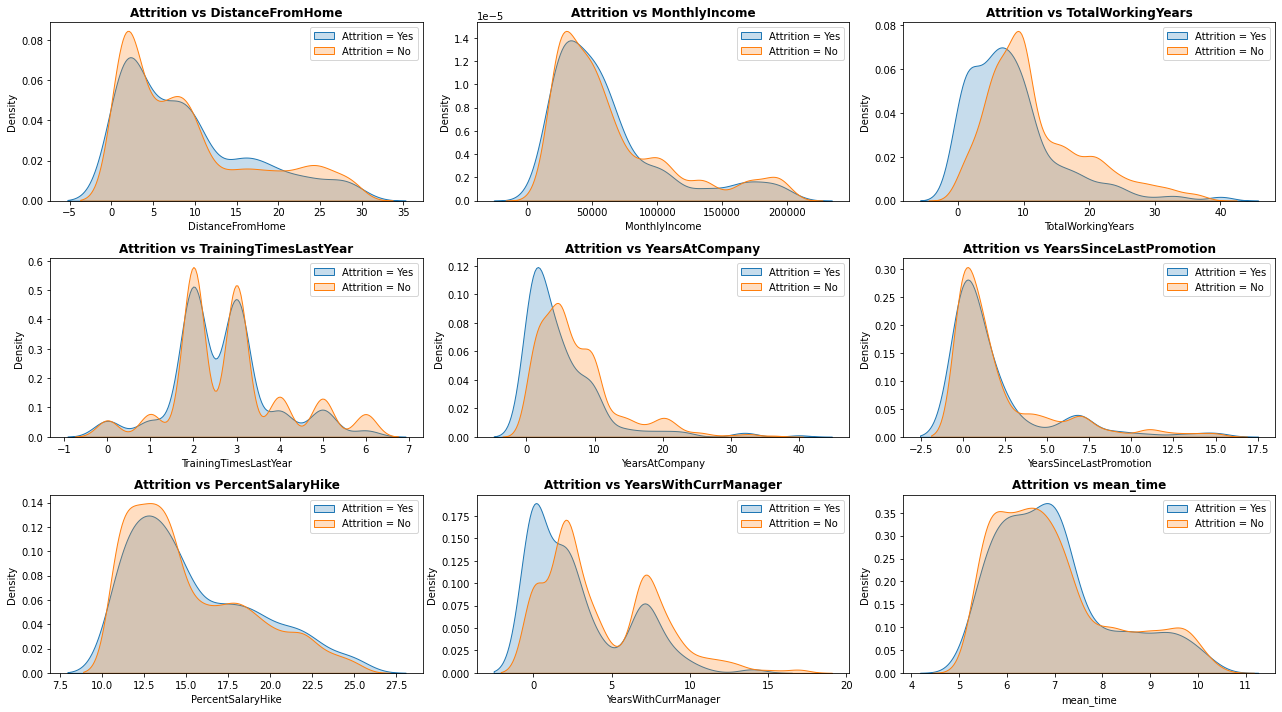

In [69]:
# Total 9 Features, so Initialize subplots having 3x3 grid
fig,ax =  plt.subplots(3,3, figsize = (18,10))

# Initialize an index which will be helpful in iterating over,
index = 0
for i in range(3):
    for j in range(3):
        # set plot title
        ax[i][j].set_title('Attrition vs %s' % (continuous_features[index]), fontsize=12, fontweight='bold')
        
        # Make kdeplot for the selected feature with respect to Attrition(yes or no) and show both curve on same plot 
        # make kdeplot for a feature when Attrition='Yes'
        sns.kdeplot(df_eda[df_eda['Attrition']=='Yes'][continuous_features[index]],shade=True,label='Attrition = Yes',ax=ax[i][j])
        
        # make kdeplot for a feature when Attrition='No'
        sns.kdeplot(df_eda[df_eda['Attrition']=='No'][continuous_features[index]],shade=True,label='Attrition = No',ax=ax[i][j]) 
        ax[i][j].legend()
        
        #increase index for continuous_features list in each iteration of for loop
        index += 1

# tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area and labels do not overlap.
plt.tight_layout()
plt.show()

- From 'Attrition vs TotalWorkingYears' and 'Attritions vs YearsAtCompany' it is clear that, employees who stay at company for a longer period of time have lower attrition rate. Similar pattern is also observed in case of 'Attrition vs Years withCurrManager'.
- From 'Attrition vs mean_time' it can also be noted that the employees who left the company had slightly higher mean working hours. So. longer working Hours may be one of the reason for Attrition.

#### Check the Taget Variable Distribution

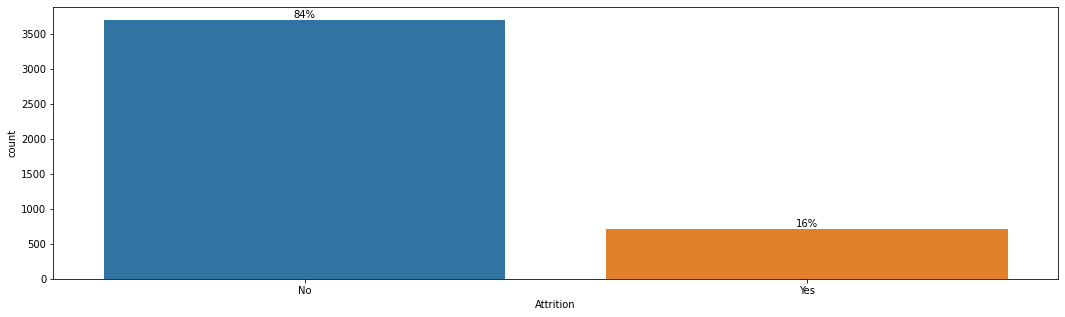

In [70]:
plt.figure(figsize=(18,5))

# Make countplot of Attrition
ax=sns.countplot(df_eda.Attrition)

get_bars = ax.patches
half_bar_length = int(len(get_bars)/2)
bar_left = get_bars[:half_bar_length]
bar_right = get_bars[half_bar_length:]

for L, R in zip(bar_left, bar_right):
    left_height = L.get_height()
    right_height = R.get_height()
    length_total = left_height + right_height

    ax.text(L.get_x() + L.get_width()/2., left_height + 30, '{0:.0%}'.format(left_height/length_total), ha="center")
    ax.text(R.get_x() + R.get_width()/2., right_height + 30, '{0:.0%}'.format(right_height/length_total), ha="center")

- 16% of employee Attrition was seen, which means out of 4409, only 3602 employees stayed.
- Also the target variable is heavily Imbalanced between the two classes. So, it will be a good idea to over-sample the data before training a Macchine Learning Model.

## Key take-aways from EDA :  

- overall 16% employee attrition was observed during the year 2015.
- Employees in Human resources are highly prone to quit with an attrition rate of 30%
- similarly employees with human resources education background had an attrition rate of 41%
- 31% of the employees who quit had bad work life balance.
- young and unmarried employees are higly prone to quit with an average attrition rate of 24.5%.
- Employees who traveled frequently were also highly prone to quit with an attrition rate of 25%.
- employees at the lower job levels quit more often than employees on the higher level.
- employees in the research department (research directors and research scientists ) are also prone to quit with an average attrition rate of 21%.
- employees who have worked in more than 4 companies show a much higher attrition rate comapred to rest. 
- attrition decreases with increasing environmental satisfaction, job satisfaction and job involvement.
- employee who leave company, worked for longer period of time, it means they could have been in higher work load or were not able to settle in company well.

<h2><center>Feature Encoding</center></h2>

In [71]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,6.979604
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,6.502698
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,6.477067
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,7.515375
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,9.803351


All the categorical variables are Nominal in nature, which means the values are independent of each other and do not follow any order therefore we will perform One-Hot encoding

In [72]:
# Store the column names in one_hot_var list. 1-hot encoding of these features will be done
one_hot_var = ['BusinessTravel', 'Department', 'EducationField','JobRole','MaritalStatus']

# perform 1-hot encoding on each column present i n one_hot_var
for i in one_hot_var:
    # perform 1-hot encoding for variable & store it in x_t dataframe
    x_t = pd.get_dummies(df[i], prefix=i, prefix_sep='_', drop_first=True) # define new column name, separator and drop 1 of them.
    
    # join x_t to df
    df = df.join(x_t)
    
    # drop original column from df as it is no longer needed
    df.drop(i, axis = 1, inplace = True)

In [73]:
# Encode Gender and Attrition
# 'Attrition' (We should also encode target variable)
df.Attrition=df.Attrition.apply(lambda x : 1 if x=='Yes' else 0)

# 'Gender'
df.Gender=df.Gender.apply(lambda x : 1 if x=='Male' else 0)

In [74]:
df.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,1,0,1,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,6.979604,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,31,1,10,1,2,0,1,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,6.502698,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,32,0,17,4,3,1,4,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,6.477067,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,38,0,2,5,4,1,3,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,7.515375,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,32,0,10,1,5,1,1,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,9.803351,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


### Split Features and Target

In [75]:
# Input Features
X = df.drop('Attrition', axis = 1)

# Target Variable
y = df['Attrition']

In [76]:
# Split Training and Testing Data using [train_test_split]
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify = y, random_state=42)

In [77]:
# Standardize input columns using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# use only first few columns, as other columns dont need to be standardized
X_train[X_train.columns[:21]] = scaler.fit_transform(X_train[X_train.columns[:21]])
X_test[X_train.columns[:21]] = scaler.transform(X_test[X_train.columns[:21]])

In [78]:
# Check for multi-colinearity
# Save the training data in a separate df which will be used for finding coorelation
df_corr = X_train.copy()

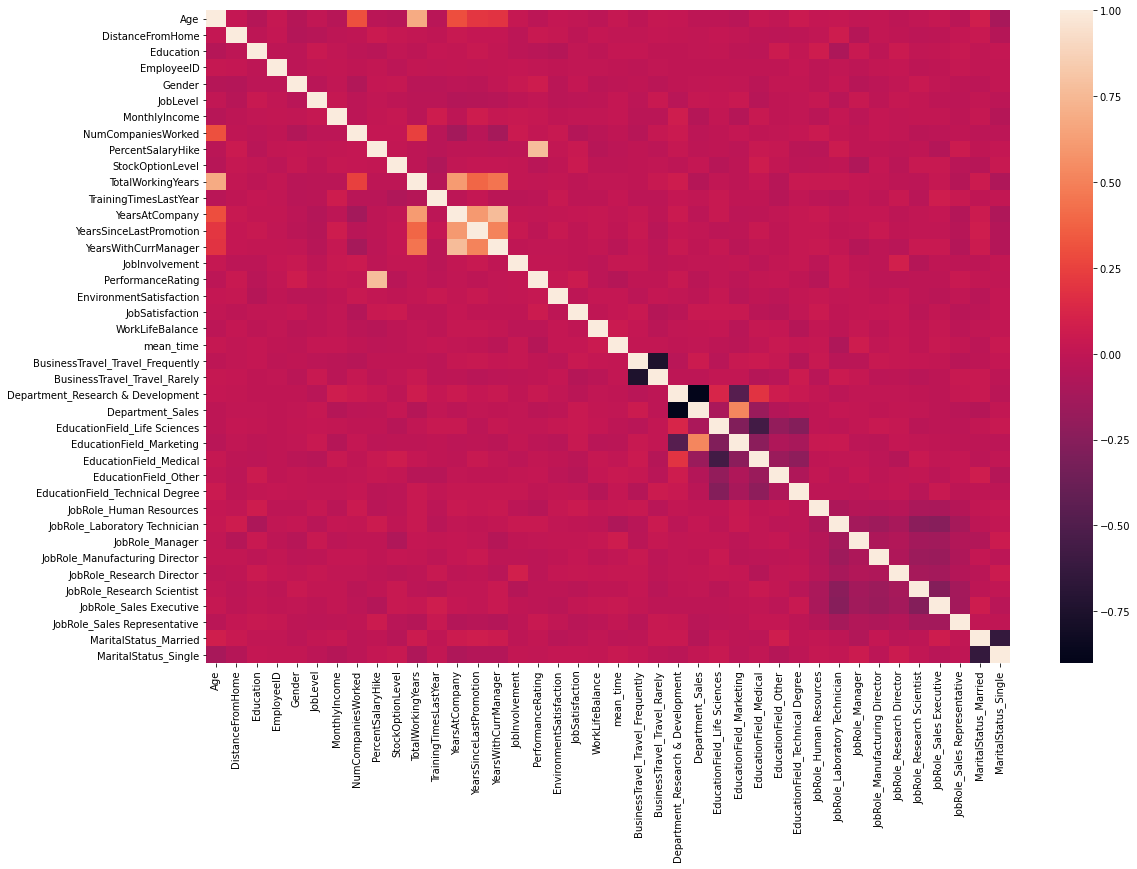

In [79]:
# plot a heatmap of correlation in training data
plt.figure(figsize = (18,12))
sns.heatmap(df_corr.corr(),cbar=True)
plt.show()

A little multi collinearity is observed.

In [80]:
# check colinearity of features with the target variables
df_corr['Attrition'] = y_train

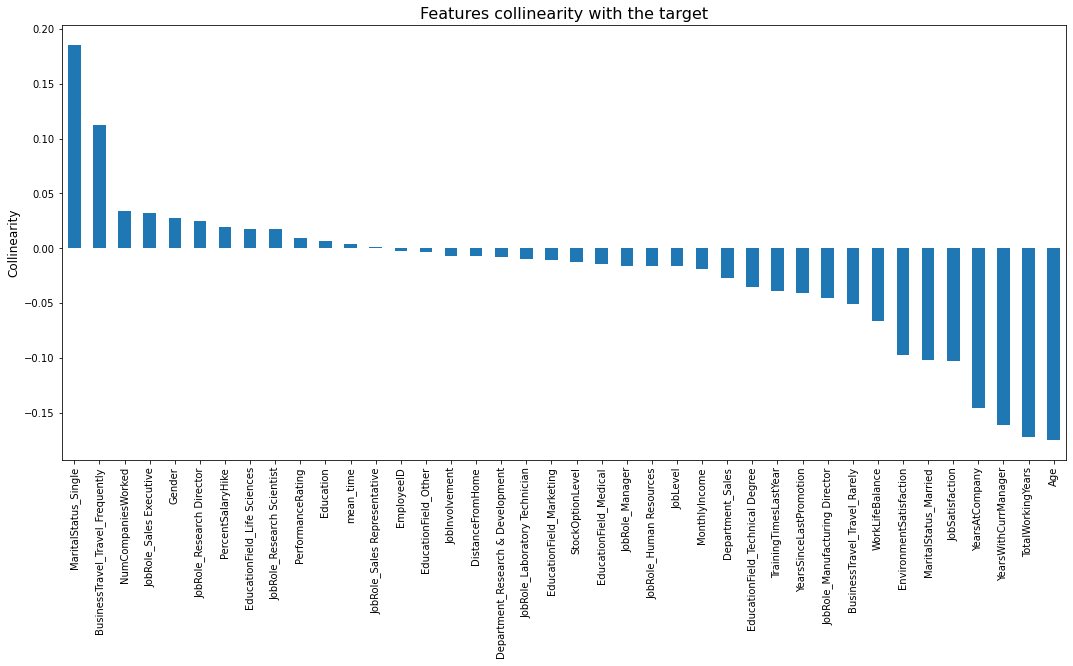

In [81]:
plt.figure(figsize=(18,8))
df_corr.corr()['Attrition'].sort_values(ascending = False)[1:].plot(kind='bar') # add [1:] to skip the target variable corr with itself
plt.title('Features collinearity with the target',fontsize=16)
plt.ylabel('Collinearity',fontsize = 12)
plt.xticks(rotation=90)
plt.show()

In [82]:
# Check if there is high multi-colinearity
# Make a dataframe of correlation between features 
df_corr1 = df_corr.corr()

# Iterate over df_corr1 and find if collinearity > 0.8 exists
for i in range(df_corr1.shape[0]):
    for j in range(df_corr1.shape[1]):
        
        # Define both conditions, i.e. absolute value of collinearity > 0.8 & collinearity not equal to 1, As Corr. with itself is always 1.
        if (abs(df_corr1.iloc[i,j]) >0.8) & (abs(df_corr1.iloc[i,j]) !=1):
            print('Correlation = ',round(df_corr1.iloc[i,j],3),df_corr1.columns[j],' & ',df_corr1.index[i])

Correlation =  -0.9 Department_Sales  &  Department_Research & Development
Correlation =  -0.9 Department_Research & Development  &  Department_Sales


In [83]:
# Department_Sales  &  Department_Research & Development are highly coorelated, so drop one of them
# Drop Department_Sales from Both Training and Testing Data
X_train.drop('Department_Sales',axis=1,inplace=True)
X_test.drop('Department_Sales',axis=1,inplace=True)

In [84]:
X_train.head()

,Age,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
2475,0.567095,-1.008063,0.078153,0.221929,-1.233588,-0.967027,2.328194,2.133569,-0.613104,0.238598,-0.547031,0.163382,-0.318483,-0.676439,-0.024183,0.384479,-0.432520,-0.666411,-0.649919,-1.099883,-0.256927,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4077,-0.637941,-0.885934,-1.871834,1.483869,0.810643,0.830045,0.131341,-0.676302,-0.342016,0.238598,-0.159305,-0.618299,0.512801,-0.676439,1.097894,0.384479,-0.432520,-1.585158,1.157173,0.335653,2.314091,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1611,-0.637941,1.800905,-1.871834,-0.458668,0.810643,0.830045,-0.430846,-0.676302,-0.613104,0.238598,-0.934758,-0.618299,-0.484740,0.275721,-0.585221,0.384479,-0.432520,1.171083,-1.553465,0.335653,0.830116,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1484,-0.966587,-1.008063,0.078153,-0.558710,0.810643,-0.967027,-0.822302,-0.676302,-0.342016,-0.935217,-0.805516,-0.618299,-0.318483,-0.676439,-0.024183,0.384479,-0.432520,1.171083,1.157173,-1.099883,-0.588327,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1530,-1.076136,0.701743,1.053146,-0.522474,0.810643,0.830045,-0.544809,-0.676302,1.826684,-0.935217,-0.934758,-0.618299,-0.484740,-0.359052,-0.585221,0.384479,2.312031,0.252336,-0.649919,-1.099883,1.801266,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


<h2><center>Model Building</center></h2>

In [85]:
# Import Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Define the model
dt_cv = DecisionTreeClassifier()

# Lets perform Cross-validation on each of then with 5 fold and find mean f1 score
print('Cross Validation Accuracy\n')

# Cross Validation on DecisionTreesClassifier
cv_dt = cross_val_score(dt_cv, X_train, y_train, cv = 5, scoring = 'accuracy').mean()
print('For Decision Trees Classifier :', round(cv_dt,3))

Cross Validation Accuracy

For Decision Trees Classifier : 0.939


In [87]:
# Lets oversample the training data
# Import Synthetic minority over-sampling from imblearn libraray
from imblearn.over_sampling import SMOTE

In [89]:
smte = SMOTE()
X_os, y_os = smte.fit_resample(X_train,y_train)  # Fit SMOTE with training data and re-sample the data to get balanced data.

In [90]:
print('Training data          0\'s   1\'s')
print('Before over-sampling  {}   {}'.format(y_train.value_counts()[0],y_train.value_counts()[1]))
print('After over-sampling   {}   {}\n'.format(y_os.value_counts()[0],y_os.value_counts()[1]))

print('After Over-sampling {} synthetic records were added to the training data and now there are equal proportion of 0\'s and 1\'s in the training data'.format(len(X_os)-len(X_train)))

Training data          0's   1's
Before over-sampling  2773   533
After over-sampling   2773   2773

After Over-sampling 2240 synthetic records were added to the training data and now there are equal proportion of 0's and 1's in the training data


In [91]:
# Initialize the model
dt_cv = DecisionTreeClassifier(max_depth=10)

# Lets perform Cross-validation on each of then with 5 fold and find mean f1 score
print('Cross Validation Accuracy')

# Cross Validation on DecisionTreesClassifier
cv_dt = cross_val_score(dt_cv, X_os, y_os, cv = 5, scoring = 'accuracy').mean()
print('For Decision Trees Classifier :', round(cv_dt,3))

Cross Validation Accuracy
For Decision Trees Classifier : 0.905


- After over-smapling, the performance of DecisionTree model increased.

<h3>Hyper-Parameter Tuning using GridSearchCV</h3>

In [92]:
# import griddearchCv
from sklearn.model_selection import GridSearchCV, cross_val_score

In [93]:
# Hyper-parameter Tuning

# Define Parameter's grid
grid = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 15,20,25,30], 
              'min_samples_split': [4, 6, 10,15,20],
              'min_samples_leaf': [1, 5, 8]
             }

# Initialize GridSearch
gs_dt = GridSearchCV(DecisionTreeClassifier(), grid, n_jobs=-1, verbose=2,scoring='accuracy',return_train_score=True)

# Perform/train Grid-search
gs_dt.fit(X_os, y_os)

print('Best Parameters :',gs_dt.best_params_)
print('Mean Train Score :',round(gs_dt.cv_results_['mean_train_score'].mean(),4))
print('Mean Test Score :',round(gs_dt.cv_results_['mean_test_score'].mean(),4))
print('Best Test  Score :',round(gs_dt.best_score_,4))

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Parameters : {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4}
Mean Train Score : 0.8323
Mean Test Score : 0.7949
Best Test  Score : 0.9547


- After Hyper-parameter tuning, the performance is slightly improved.
- Also, there is slight difference in the train and test score which means our model has not over-fitted.

In [94]:
# Define the Best Model using hyper-parameters obtained after tuning
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 25, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 4)

In [95]:
# Train the best model and make prediction for the testing data
y_pred = dt.fit(X_os,y_os).predict(X_test)

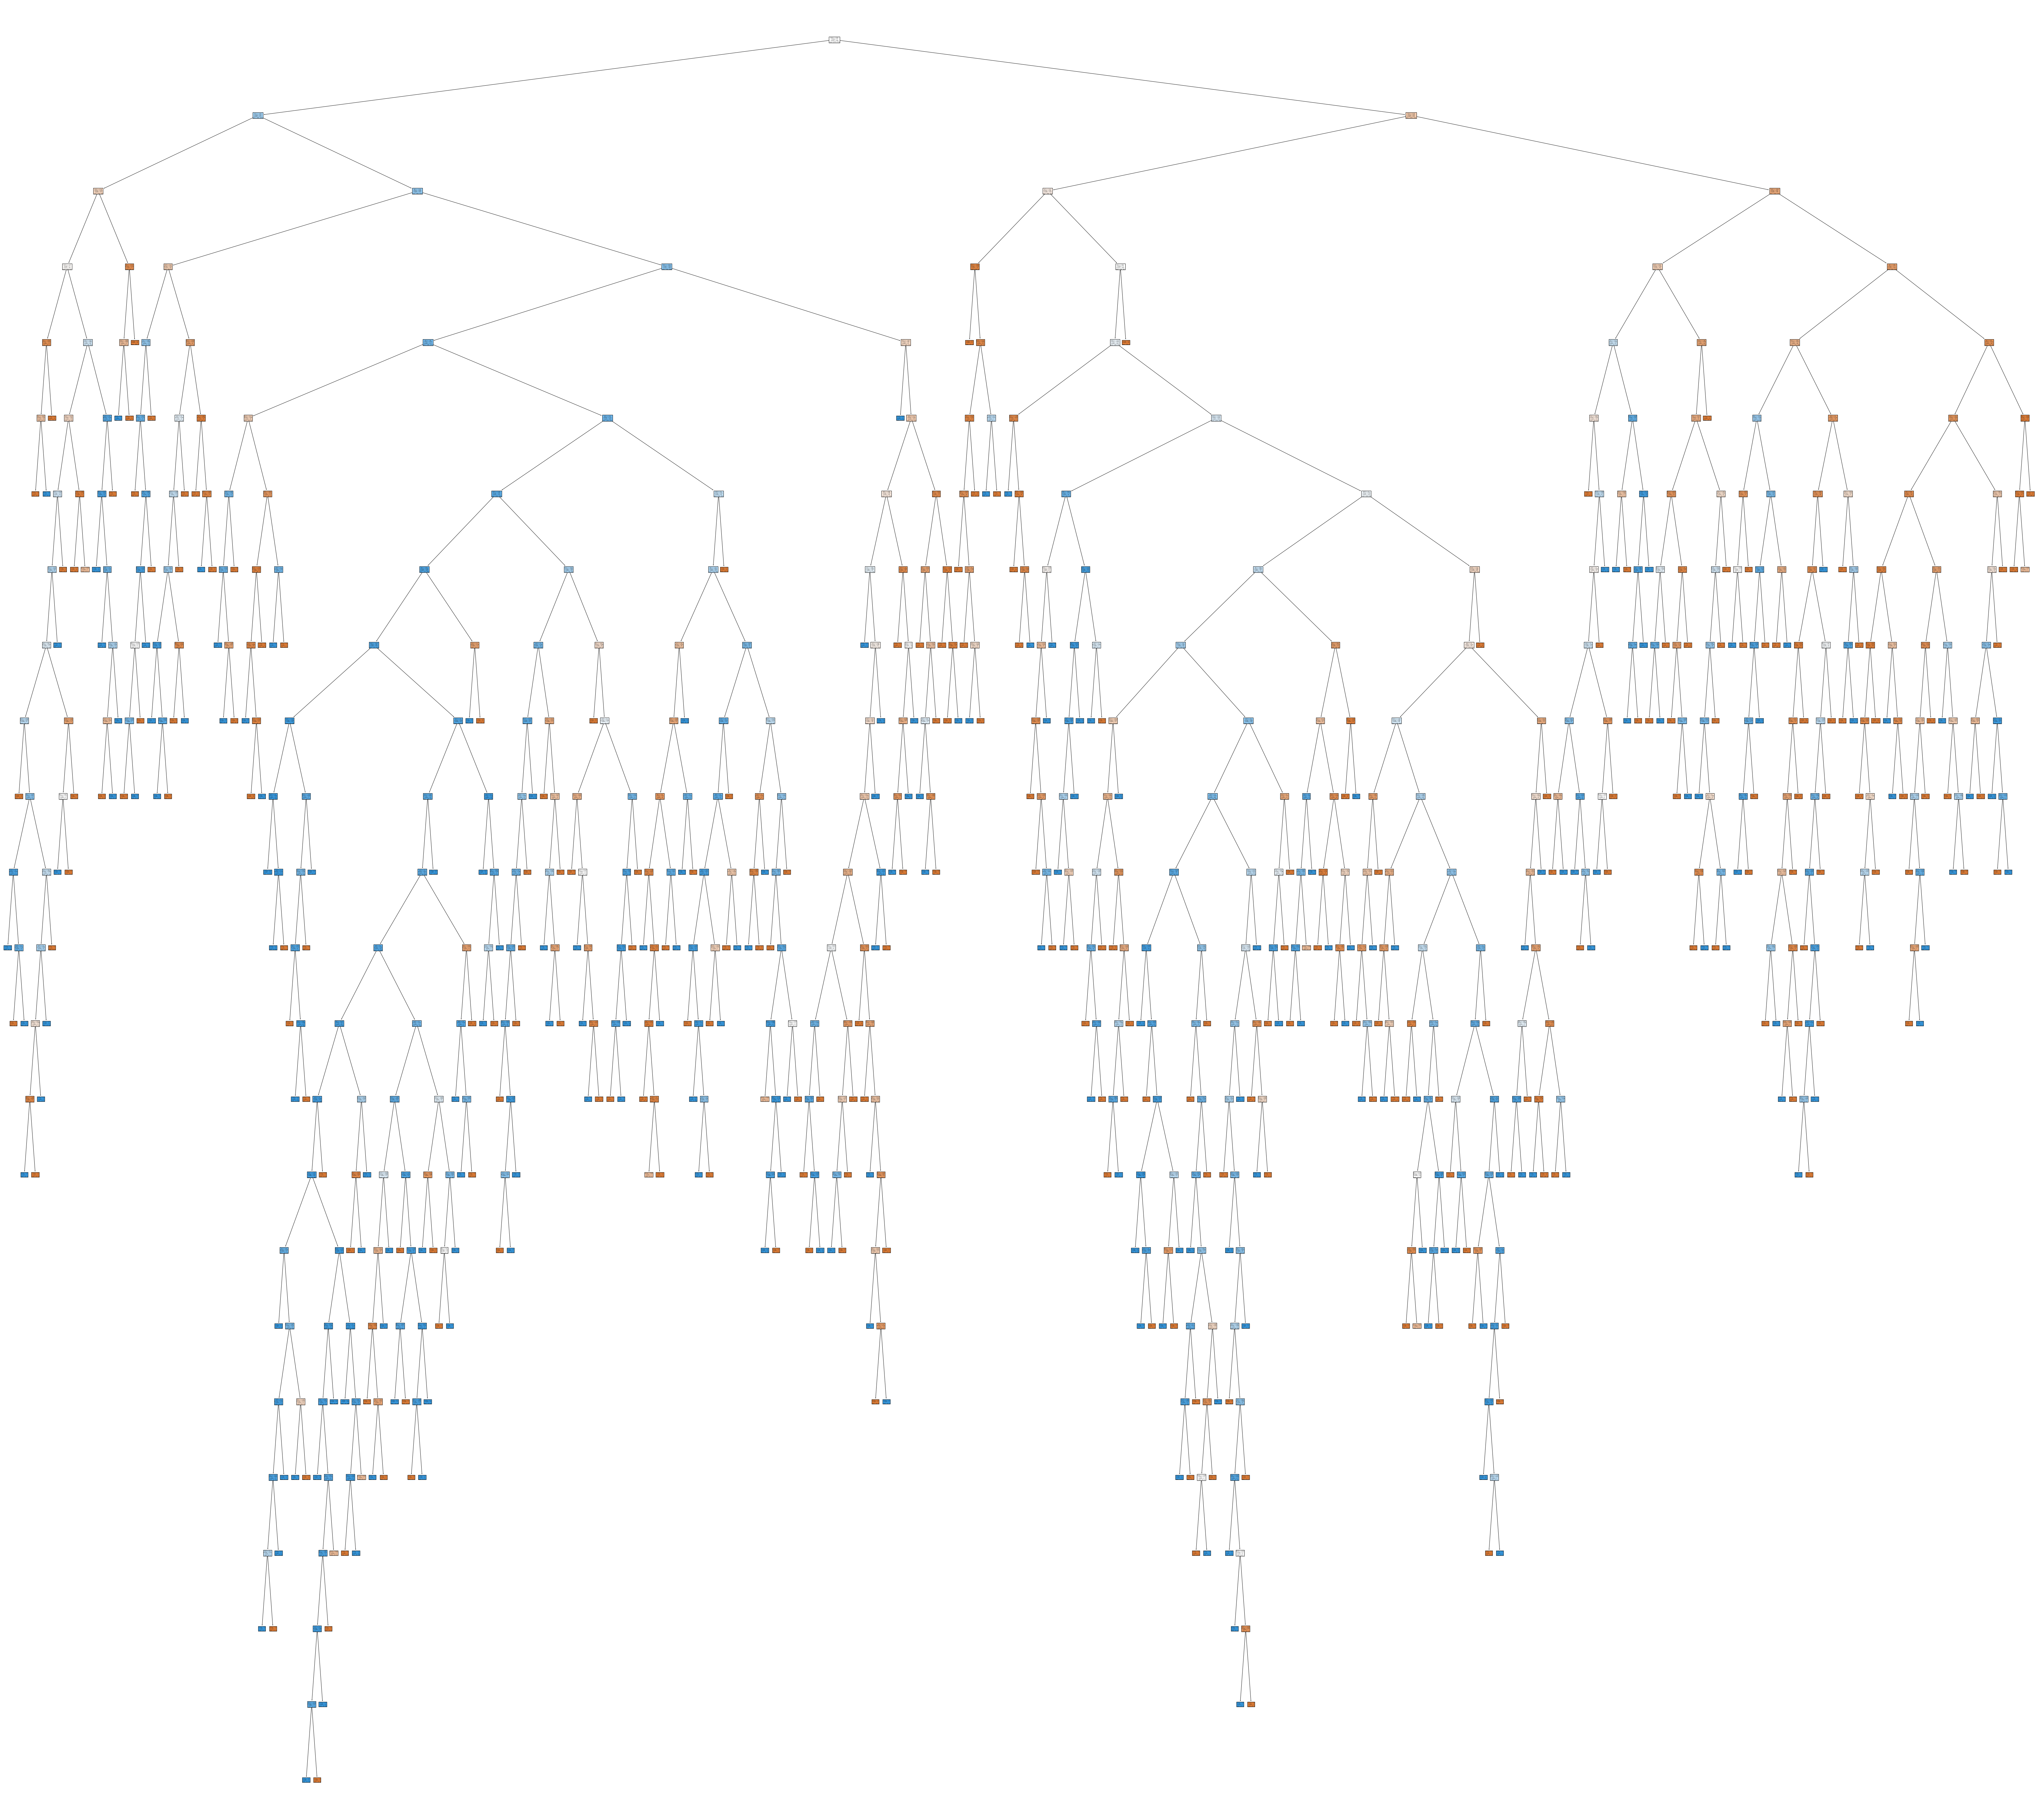

In [97]:
# Lets visualize the trained Decision tree
# Import tree from sklearn to visualize the tree
from sklearn import tree

# Initialize Figure
plt.figure(figsize=(120,110))

# Plot Decision tree
tree.plot_tree(dt, filled=True)
plt.show()

<h2><center>Model Evaluation</center></h2>

In [98]:
# import performance metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [99]:
print('Accuracy  score : ' + str(round(accuracy_score(y_test,y_pred),3)))


print('Precision score : ' + str(round(precision_score(y_test,y_pred),3)))
print('Recall    score : ' + str(round(recall_score(y_test,y_pred),3)))
print('F1        score : ' + str(round(f1_score(y_test,y_pred),3)))

print('\nConfusion Matrix\n' + str(confusion_matrix(y_test, y_pred)))

Accuracy  score : 0.965
Precision score : 0.884
Recall    score : 0.899
F1        score : 0.891

Confusion Matrix
[[904  21]
 [ 18 160]]


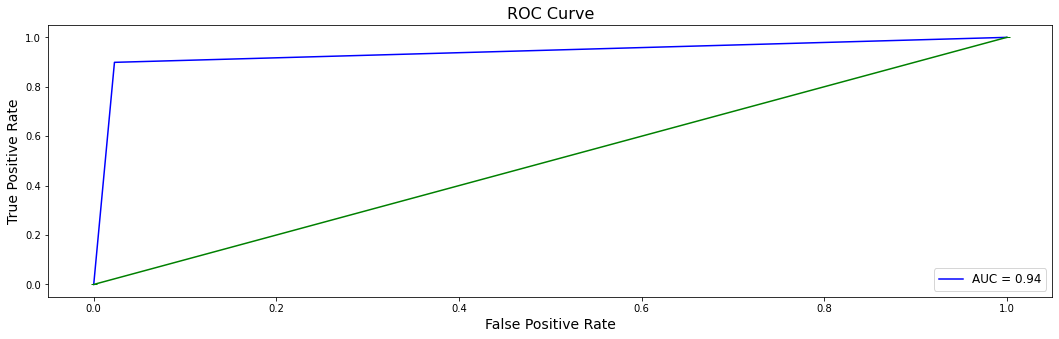

In [100]:
# Plot ROC curve
# Import auc, roc_curve
from sklearn.metrics import auc, roc_curve

# Get false positive rate, true positive rate and threshold
fpr, tpr, threshold = roc_curve(y_test, y_pred)

# Compute Area under curve
area = auc(fpr, tpr)

# plot the roc curve
# Initialize Figure
plt.figure(figsize=(18,5))

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % area)

# plot straight line
plt.plot([0, 1], [0, 1],color='g', marker='_')

# set plot title, xlabel, ylabel, legend
plt.title('ROC Curve', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.legend(loc = 'lower right', fontsize = 12)

plt.show()

In [101]:
# check classification report
from sklearn.metrics import classification_report

print('Classification Report\n',classification_report(y_test, y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       925
           1       0.88      0.90      0.89       178

    accuracy                           0.96      1103
   macro avg       0.93      0.94      0.94      1103
weighted avg       0.96      0.96      0.96      1103

